## Question 1a: MLE of a Gaussian $$p_{model}(x|w)$$

In [ ]:
# given data
data = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]
# normal gradient descent algorithm is used
eta = 0.001 # learning rate
epochs = 100000 # iterations of algorithm - the loss function is calculated and the parameters are reassigned this many times
m = len(data) # amount of data we have
# hypothesized generating parameters (starting point for algorithm) for gaussian process that generates parameters
mean = 0
variance = 1
for epoch in range(epochs):
  # This part of the algorithm calculates the partial derivative of the log likelihood function
  # with respect to the two parameters (mean and variance)
  diff_sum = 0
  diff_square_sum = 0
  for num in data: # iteration through the data to calculate the summation parts of each formula
    diff_sum += (num - mean)
    diff_square_sum += ((num - mean)**2)
  # final partial derivatives
  D_m = diff_sum / variance
  D_v = (1/2/variance)*(-m + diff_square_sum/variance)
  # reassigning parameters based on the results of the partial derivative and the hyperparameter, the learning rate
  mean = mean + eta * D_m
  variance = variance + eta * D_v
print("Mean: ", mean, "\nVariance: ", variance) # prints parameters generated using gradient descent algorithm
print("Actual Mean: ", np.mean(data), "\nActual Variance: ", np.var(data)) # prints the computed values using given data
# Summary:
# I set the learning rate to a small number and epochs to a large number for precision
# I set arbitrary values for the guess as to what the mean and variance (hypothesis)
# I repeated the following indented steps for the number of epochs that were set
    # I calculated the partial derivative of the log liklihood function with resepct
    # to the mean and the variance; the formulas from the provided article were used
    # Utilizing this partial derivative and the learning rate, I recalculated and
    # reassigned the parameter values
# I  printed out the generated parameters and the actual computed values

Mean:  6.214285714285531 
Variance:  5.882653059912462
Actual Mean:  6.214285714285714 
Actual Variance:  5.882653061224489


## Question 2: MLE of Conditional Gaussian $$p_{model}(y|x,w)$$


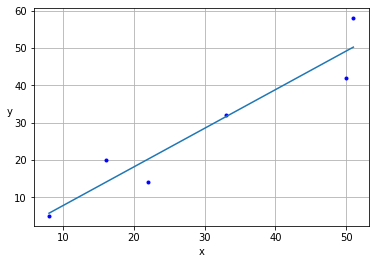

w1:  1.035678460487869 
w2:  -2.5640895564215374


In [126]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
# given data
x = np.array([8, 16, 22, 33, 50, 51])
y = np.array([5, 20, 14, 32, 42, 58])
# normal gradient descent algorithm is used
eta = 0.0001 # learning rate
epochs = 100000 # iterations of algorithm
m = len(x) # amount of examples we have
# initial hypotheses for parameters
w1 = 0
w2 = 0
for epoch in range(epochs):
  # predicted output using current parameters
  y_hat = w1*x + w2
  # partial derivatives with respect to each parameter
  D_w1 = (-2/m) * sum(x * (y - y_hat))
  D_w2 = (-2/m) * sum(y - y_hat)
  # updating parameters
  w1 = w1 - eta * D_w1
  w2 = w2 - eta * D_w2
final_y_hat = w1 * x + w2 # predicted output using model parameters
# plotting given data
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.grid()
plt.plot(x, y, "b.") # plots given data
plt.plot(x, final_y_hat) # plots predicted output
plt.plot()
plt.show()
print("w1: ", w1, "\nw2: ", w2) # prints parameters